In [1]:
# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Load the MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()

# Print the shape and type of the data
print(x_train_full.shape) # (60000, 28, 28)
print(y_train_full.shape) # (60000,)
print(x_test.shape) # (10000, 28, 28)
print(y_test.shape) # (10000,)
print(x_train_full.dtype) # uint8
print(y_train_full.dtype) # uint8


2023-06-24 10:45:42.493716: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
uint8
uint8


In [2]:
# Get the length of the arrays
n = len(x_train_full)

# Get 10% of the length as the sample size
k = int(n * 0.001)

# Generate k random indices without replacement
idx = np.random.choice(n, size=k, replace=False)

# Select the elements from x_train and y_train using the indices
x_train = x_train_full[idx]
y_train = y_train_full[idx]

print(x_train.shape) # (60000, 28, 28)
print(y_train.shape) # (60000,)

(60, 28, 28)
(60,)


In [3]:

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [30]:

# Create a model
model = keras.Sequential([
  keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(64, 3, activation='relu'),
  keras.layers.MaxPooling2D(2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])


In [31]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [32]:
model.fit(x_train, y_train, batch_size = 6, epochs=10)


Epoch 1/10
10/10 [==============================] - 1s 16ms/step - loss: 2.2799 - accuracy: 0.1833
Epoch 2/10
10/10 [==============================] - 0s 14ms/step - loss: 1.9657 - accuracy: 0.3833
Epoch 3/10
10/10 [==============================] - 0s 14ms/step - loss: 1.5472 - accuracy: 0.5333
Epoch 4/10
10/10 [==============================] - 0s 14ms/step - loss: 0.9812 - accuracy: 0.7000
Epoch 5/10
10/10 [==============================] - 0s 13ms/step - loss: 0.5914 - accuracy: 0.9000
Epoch 6/10
10/10 [==============================] - 0s 13ms/step - loss: 0.3152 - accuracy: 0.9167
Epoch 7/10
10/10 [==============================] - 0s 15ms/step - loss: 0.1476 - accuracy: 0.9667
Epoch 8/10
10/10 [==============================] - 0s 15ms/step - loss: 0.0676 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 17ms/step - loss: 0.0271 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 18ms/step - loss: 0.0149 - accuracy: 1.0000


In [33]:
import math 


# Evaluate the model
model.evaluate(x_test, y_test)

# Make predictions
import numpy as np

# Select a sample image
img = x_test[0]

# Add a batch dimension
img = np.expand_dims(img, axis=0)

# Generate probabilities for each class
probs = model.predict(img)

# Get the predicted class
pred = np.argmax(probs)

# Print the result
print(f'The predicted class is {pred}')


1/1 [==============================] - 0s 186ms/step
The predicted class is 7


1/1 [==============================] - 0s 23ms/step
9
1/1 [==============================] - 0s 40ms/step
2
1/1 [==============================] - 0s 37ms/step
9
1/1 [==============================] - 0s 36ms/step
5


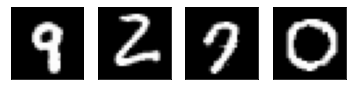

In [38]:
# Import matplotlib
import matplotlib.pyplot as plt

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(1, 4)

# Set the colormap to grayscale
plt.gray()

examples = np.random.choice(range(len(x_test)), size=20, replace=False)

examples = x_test[examples]

# Loop over the subplots and show an image
for i, ax in enumerate(axes.flat):
  
  # Generate probabilities for each class
  print(np.argmax(model.predict(np.expand_dims(examples[i], axis=0))))
  
  # Select an image
  img = examples[i]

  # Show the image on the subplot
  ax.imshow(img)

  # Remove the axes ticks
  ax.set_xticks([])
  ax.set_yticks([])

# Display the figure
plt.show()



(array([ 6., 10.,  5.,  1.,  3.,  6.,  4.,  8., 10.,  7.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

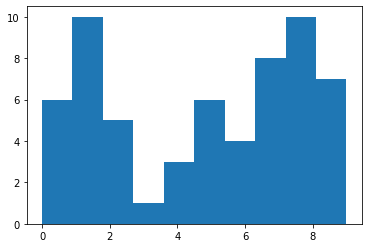

In [16]:
plt.hist(y_train)

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              